# Economic Understanding
The most important aspect of breaking down the economics that take place, this will require the following information

- value of cars sold
- inflation rates
- unemployment rates
- total salaries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def normalize_data(df):    
    # Apply normalization to each column
    normalized_df = df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
    
    return normalized_df

## Economic Data

### GDP

In [3]:
gdp = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Automotive Industry/preprocessed_datasets/economic_datasets/gdp.csv')
gdp.set_index('date',inplace=True)

### Inflation Rate

In [4]:
inflation_rate = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Automotive Industry/preprocessed_datasets/economic_datasets/inflation_rate.csv')
inflation_rate.set_index('date',inplace=True)

### Unemployment Rate

In [5]:
unemployment_rate = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Automotive Industry/preprocessed_datasets/economic_datasets/unemployment.csv')
unemployment_rate.set_index('date',inplace=True)

### Interest Rates

In [6]:
interest_rates = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Automotive Industry/preprocessed_datasets/economic_datasets/interest_rates.csv')
interest_rates.set_index('date',inplace=True)

## Car Sales Data

In [7]:
sales_data = pd.read_csv('/Users/ben_nicholson/Visual_Code_Projects/Personal_Projects/Maryland Automotive Industry/preprocessed_datasets/car_datasets/sales_data.csv')
sales_data.set_index('date',inplace=True)
sales_data['total_average_tvalue'] = sales_data['total_value_cars_sold'] / sales_data['total_cars_sold']
sales_data['new_average_tvalue'] = sales_data['new_value_cars_sold'] / sales_data['new_cars_sold']
sales_data['used_average_tvalue'] = sales_data['used_value_cars_sold'] / sales_data['used_cars_sold']

In [8]:
car_price_sales = sales_data[['total_value_cars_sold','total_average_tvalue']].copy()
car_price_sales

,total_value_cars_sold,total_average_tvalue
date,,
2002-01-01,1141497749,14086.825725
2002-02-01,1025807465,13067.278095
2002-03-01,1225051631,13169.907557
2002-04-01,1279429447,13290.149965
2002-05-01,1297575194,13249.215753
...,...,...
2023-08-01,2131035952,27112.071755
2023-09-01,1879114283,27124.257095
2023-10-01,1863262680,26907.097389


In [9]:
monthly_economic_data = pd.concat([interest_rates,unemployment_rate,inflation_rate,car_price_sales],axis=1)
monthly_economic_data

,fedfunds,unemployment_rate,cpiaucsl,total_value_cars_sold,total_average_tvalue
date,,,,,
2002-01-01,1.73,5.0,177.700,1141497749,14086.825725
2002-02-01,1.74,5.0,178.000,1025807465,13067.278095
2002-03-01,1.73,5.0,178.500,1225051631,13169.907557
2002-04-01,1.75,4.9,179.300,1279429447,13290.149965
2002-05-01,1.75,4.9,179.500,1297575194,13249.215753
...,...,...,...,...,...
2023-08-01,5.33,2.1,306.187,2131035952,27112.071755
2023-09-01,5.33,2.2,307.288,1879114283,27124.257095
2023-10-01,5.33,2.3,307.531,1863262680,26907.097389


In [10]:
normalise_monthly_economic_data = normalize_data(monthly_economic_data)
normalise_monthly_economic_data

,fedfunds,unemployment_rate,cpiaucsl,total_value_cars_sold,total_average_tvalue
date,,,,,
2002-01-01,0.318182,0.436620,0.000000,0.306103,0.152618
2002-02-01,0.320076,0.436620,0.002289,0.225546,0.093768
2002-03-01,0.318182,0.436620,0.006105,0.364282,0.099692
2002-04-01,0.321970,0.422535,0.012210,0.402146,0.106633
2002-05-01,0.321970,0.422535,0.013736,0.414781,0.104270
...,...,...,...,...,...
2023-08-01,1.000000,0.028169,0.980502,0.995131,0.904449
2023-09-01,1.000000,0.042254,0.988904,0.819715,0.905153
2023-10-01,1.000000,0.056338,0.990759,0.808677,0.892618


In [11]:
normalise_monthly_economic_data.index = pd.to_datetime(normalise_monthly_economic_data.index)

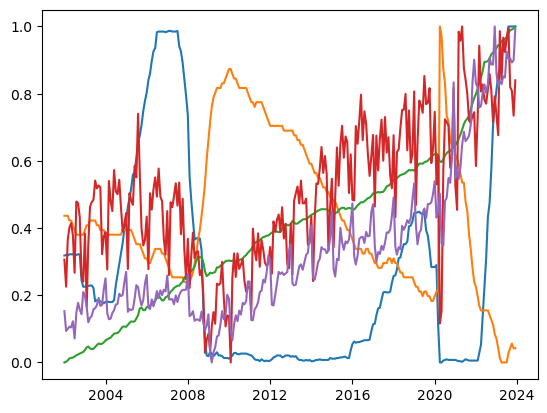

In [12]:
plt.plot(normalise_monthly_economic_data)